# Analisador de sentimentos para ler e interpretar textos 

In [1]:
import pandas as pd

resenha = pd.read_csv("dados/imdb-reviews-pt-br.csv")
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [2]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, 
                                                              resenha.sentiment,
                                                              random_state = 42)

In [3]:
# isso aqui não funciona porque a máquina não entende o texto, temos que traduzir os dados textuais!!!

from sklearn.linear_model import LogisticRegression    # modelo de logit - binario
regressao_logit = LogisticRegression()
regressao_logit.fit(treino, classe_treino)
acuracia = regressao_logit.score(teste, classe_teste)
print(acuracia)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [4]:
print("Negativo \n")
print(resenha.text_pt[1])

Negativo 

Este é um exemplo do motivo pelo qual a maioria dos filmes de ação são os mesmos. Genérico e chato, não há nada que valha a pena assistir aqui. Um completo desperdício dos talentos de Ice-T e Cubo de Gelo que foram mal aproveitados, cada um comprovando que são capazes de atuar e agir bem. Não se incomode com este, vá ver New Jack City, Ricochet ou assistir New York Undercover para Ice-T, ou Boyz no Hood, Higher Learning ou Friday for Ice Cube e ver o negócio real. Ice-Ts horrivelmente clichê diálogo sozinho faz este filme ralar os dentes, e eu ainda estou me perguntando o que diabos Bill Paxton estava fazendo neste filme? E por que diabos ele sempre interpreta exatamente o mesmo personagem? Dos extraterrestres em diante, todos os filmes que eu vi com Bill Paxton o fizeram interpretar exatamente o mesmo personagem irritante, e pelo menos em Aliens seu personagem morreu, o que o tornou um pouco gratificante ... No geral, esse é lixo de ação de segunda classe. Existem incontáve

In [5]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [6]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [7]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [8]:
classificacao = resenha['sentiment'].replace(['neg','pos'], [0,1])
resenha['classificacao'] = classificacao

In [9]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Implementando o Bag of Words 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# corpus - vocabulário
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]
vetorizar = CountVectorizer(lowercase=False)      # mantém letras maiúsculas
bag_of_words = vetorizar.fit_transform(texto)

In [12]:
vetorizar.get_feature_names()     # retorna as palavras do vocabulário

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [13]:
# a saída do bag of words é uma matriz esparça (maioria dos valores é zero)

In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                     columns = vetorizar.get_feature_names())
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [15]:
vetorizar = CountVectorizer(lowercase=False, max_features = 50)    # o max_features vai selecionar as 50 palavras mais relevantes só para vetorizar   
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [16]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):        # texto = DataFrame
    vetorizar = CountVectorizer(lowercase=False, max_features = 50)      
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    
    from sklearn.linear_model import LogisticRegression    # modelo de logit - binario
    regressao_logit = LogisticRegression()
    regressao_logit.fit(treino, classe_treino)
    return regressao_logit.score(teste, classe_teste)

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [17]:
# preciso que as as palavras com maior representividade semântica estejam mais próximas das 50 primeiras posições
# vamos fazer wordcloud para ver quem aparece mais 

%matplotlib inline    
from wordcloud import WordCloud

# a entrada da word cloud é uma lista de palavras, vamos ter que usar um método de list compress
todas_palavras = ' '.join([texto for texto in resenha.text_pt])  # todas as frases separadas por espaço
nuvem_palavras = WordCloud(width = 800, height = 500, 
                          max_font_size = 110, 
                          collocations = False).generate(todas_palavras)   
# width e height não determinam o tamanho da imagem, mas sim onde as palavras vão ser distribuídas
# collocation = True faz a análise por bigrama (um filme, este filme, etc)

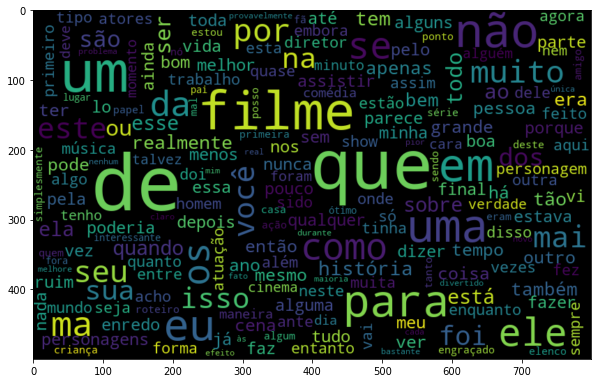

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.show()

In [19]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [20]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])  # todas as frases separadas por espaço
    nuvem_palavras = WordCloud(width = 800, height = 500, 
                              max_font_size = 110, 
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize = (10,7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.show()

In [21]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])  # todas as frases separadas por espaço
    nuvem_palavras = WordCloud(width = 800, height = 500, 
                              max_font_size = 110, 
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize = (10,7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.show()

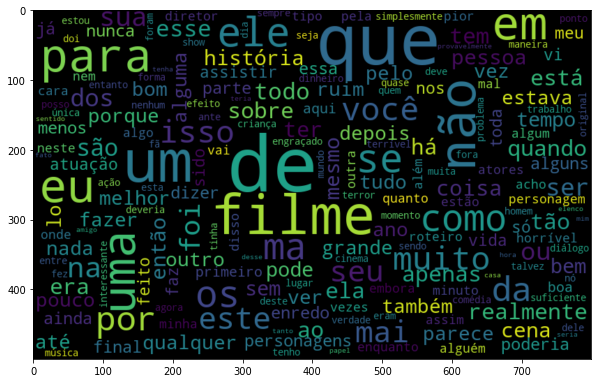

In [22]:
nuvem_palavras_neg(resenha, "text_pt")

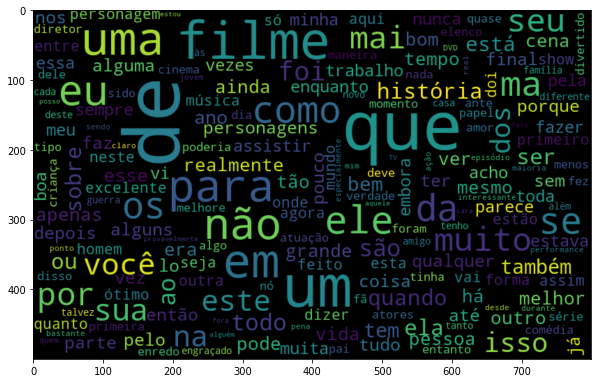

In [23]:
nuvem_palavras_pos(resenha, "text_pt")

## Vamos usar agora uma bibliotece de processamento de linguagem natural que dá suporte para diferentes idiomas 

In [24]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]

[nltk_data]    |   Unzipping corpora\ppattach.zip.
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\problem_reports.zip.
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\ptb.zip.
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\product_reviews_1.zip.
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\product_reviews_2.zip.
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\Rolemberg\AppData\Roaming\nltk_data

False

## Tokenização: processo de separar a em tokens (separar frase palavra por palavra, com espaço)

In [25]:
import nltk
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia


FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [26]:
from nltk import tokenize

frase = "Bem vindo ao mundo PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'PLN!']


In [27]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [28]:
df_frequencia = pd.DataFrame({"Palavra" : list(frequencia.keys()), 
                             "Frequência" : list(frequencia.values())})
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


## Gráfico de Pareto 

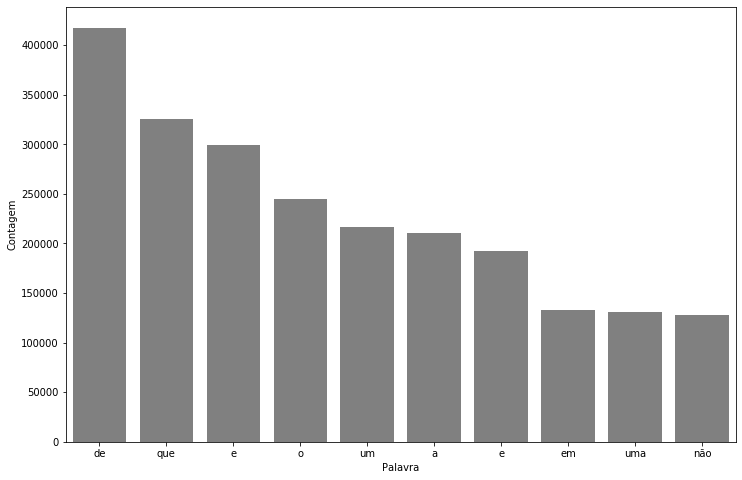

In [58]:
import seaborn as sns
    
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

pareto(resenha,"text_pt", 10)

## Tratamento: eliminando as palavras sem valor semântico

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

# preciso acessar cada resenha e eliminar as stopwords
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_1"] = frase_processada 

In [32]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [33]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6607359482410028

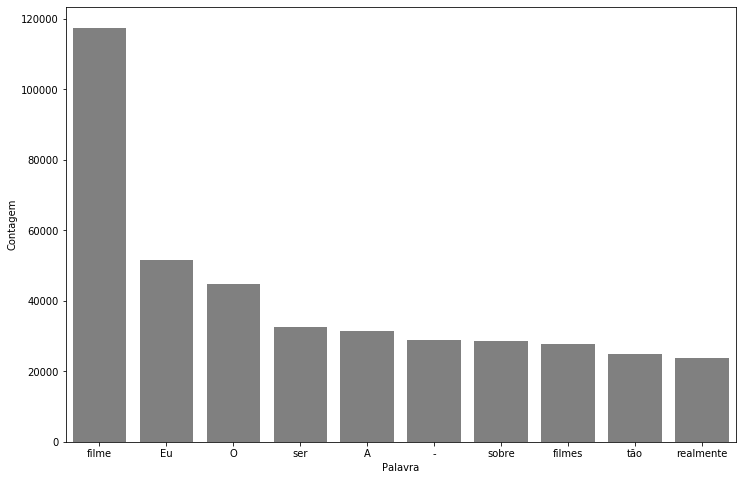

In [56]:
pareto(resenha, "tratamento_1", 10)

# Manipulando Strings para retirar pontuações 

In [37]:
from nltk import tokenize

frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', 'mundo', '!']


In [46]:
from string import punctuation

pontuacao = list()
for ponto in punctuation: 
    pontuacao.append(ponto)

pontuacao_stop_words = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stop_words:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_2"] = frase_processada

In [47]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [48]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [50]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

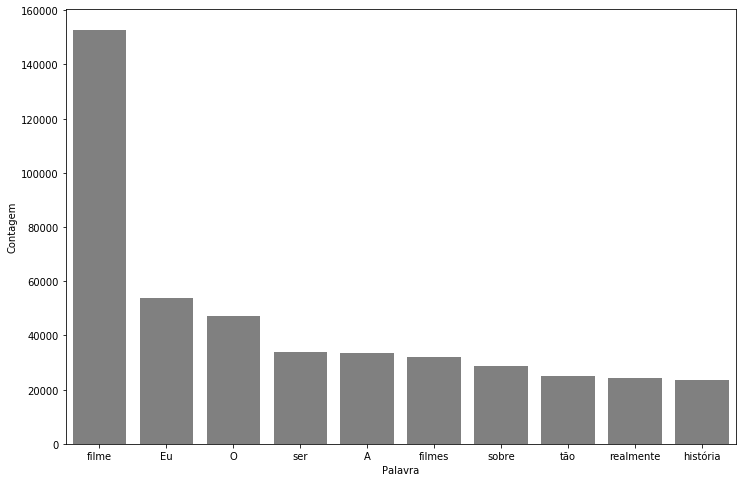

In [59]:
pareto(resenha, "tratamento_2", 10)

In [62]:
# Retirando acentos

import unidecode

acentos = "ótimo péssimo não é tão"
teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [63]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [64]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [66]:
stop_words_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stop_words]
stop_words_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'de',
 'a',
 'o',
 'que',
 'e',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'nao',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'a',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'ja',
 'eu',
 'tambem',
 'so',
 'pelo',
 'pela',
 'ate',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voce',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'as',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nos',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voces',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 

In [78]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stop_words:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_3"] = frase_processada

In [68]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [70]:
acuracia_tratamento_3 = classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento_3)

0.6810351799433886


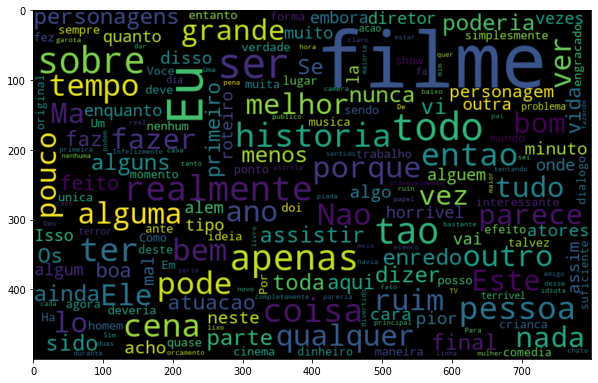

In [71]:
nuvem_palavras_neg(resenha, "tratamento_3")

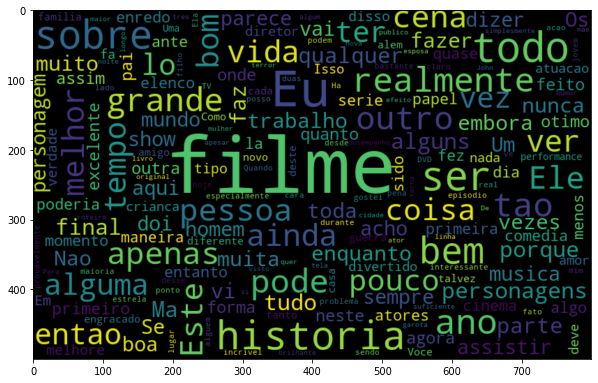

In [73]:
nuvem_palavras_pos(resenha, "tratamento_3")

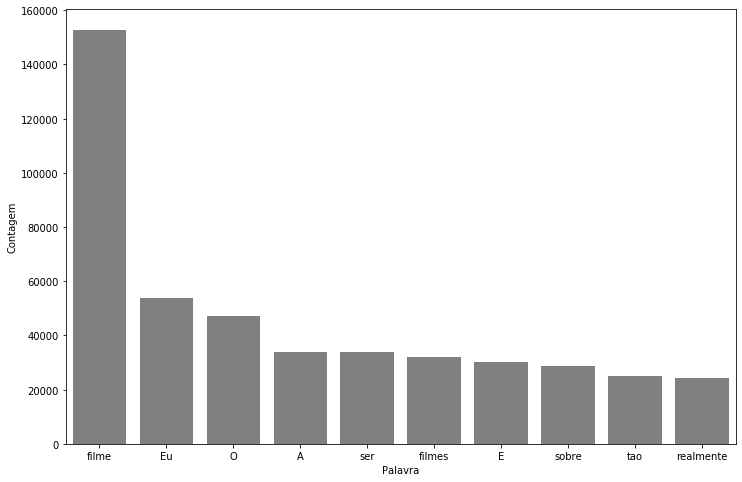

In [74]:
pareto(resenha, "tratamento_3", 10)

In [75]:
# transformando todos os dados em letra minúscula

frase = "O Thiago é o novo instrutor da Alura"
print(frase.lower())

o thiago é o novo instrutor da alura


In [79]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_4"] = frase_processada

In [77]:
resenha["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [80]:
resenha["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [81]:
acuracia_tratamento_4 = classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tratamento_4)
print(acuracia_tratamento_3)

0.6879094217549535
0.6810351799433886


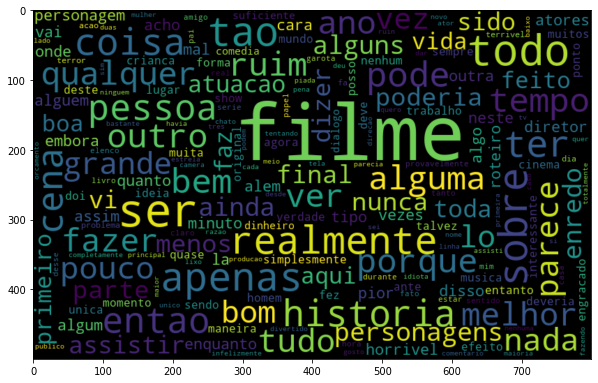

In [82]:
nuvem_palavras_neg(resenha, "tratamento_4")

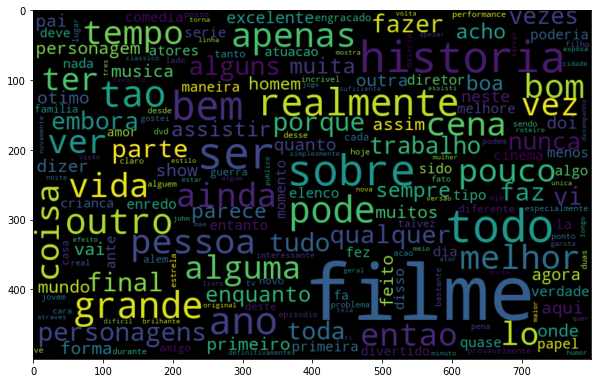

In [83]:
nuvem_palavras_pos(resenha, "tratamento_4")

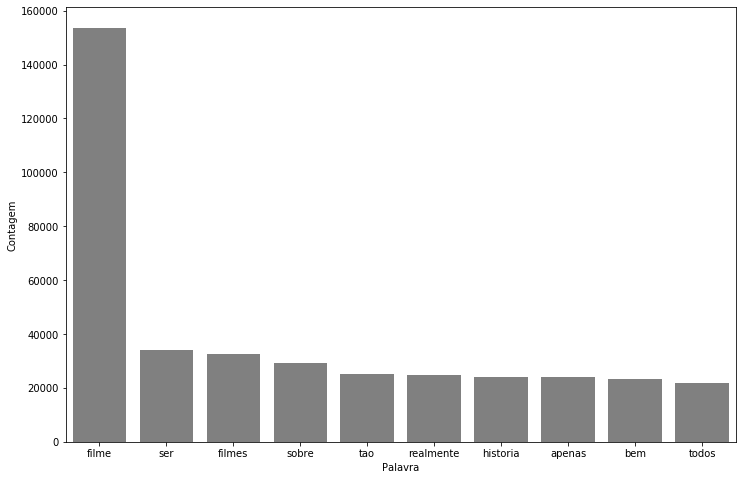

In [84]:
pareto(resenha, "tratamento_4", 10)

### vamos tratar agora reduzindo as palavras a um radical comum - stemmetização (stemmer)

In [86]:
# RSLP é o removedor de sufixo - transforma as palavras em um radical comum (português)
import nltk
nltk.download('rslp')

stemmer = nltk.RSLPStemmer()
stemmer.stem("filmagem")

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Rolemberg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


'film'

In [87]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha["tratamento_5"] = frase_processada

In [89]:
acuracia_tratamento_5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento_5)
print(acuracia_tratamento_4)

0.6943792964011323
0.6879094217549535


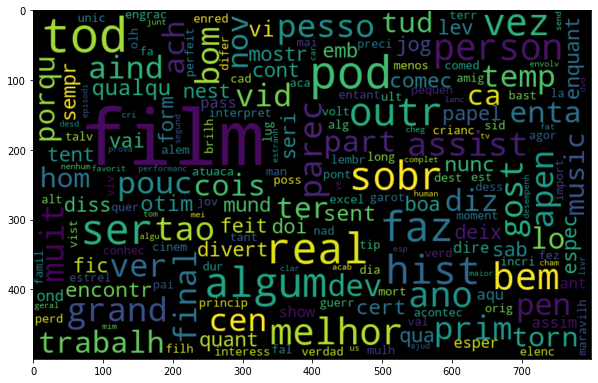

In [90]:
nuvem_palavras_pos(resenha, "tratamento_5")

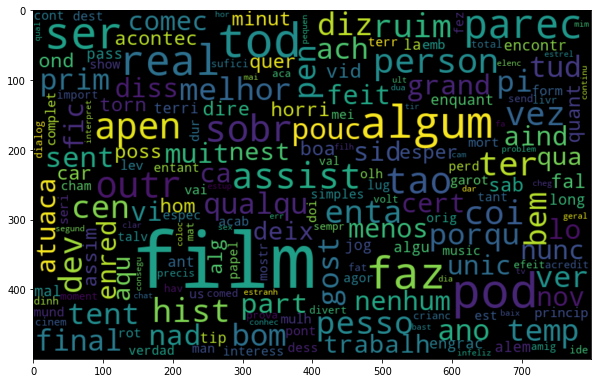

In [91]:
nuvem_palavras_neg(resenha, "tratamento_5")

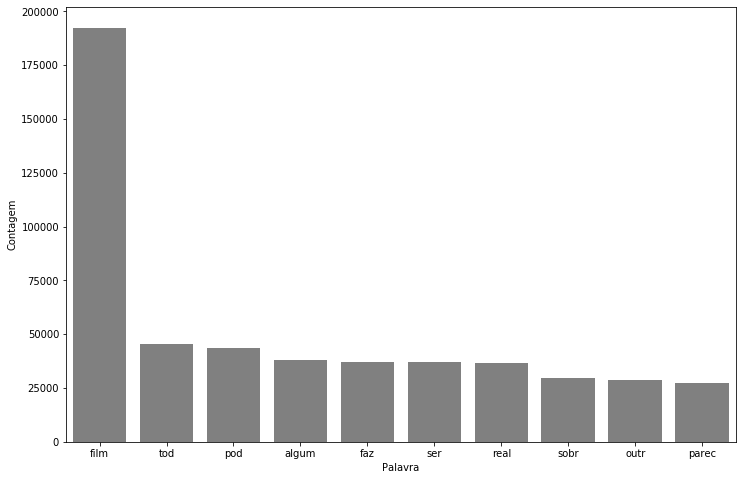

In [92]:
pareto(resenha, "tratamento_5", 10)

### Mudando a forma de vetorizar as frases (vetorização tfidf)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]
tfidf = TfidfVectorizer(lowercase = False, max_features = 50)
caracteristicas = tfidf.fit_transform(frases)

# transformando os dados esparsos em uma matriz convencional
pd.DataFrame(
    caracteristicas.todense(), 
    columns = tfidf.get_feature_names()
)

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [97]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, 
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logit.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logit.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [98]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, 
                                                              resenha["classificacao"],
                                                              random_state = 42)
regressao_logit.fit(treino, classe_treino)
acuracia_tfidf_tratados= regressao_logit.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6988273352203801


In [99]:
print(acuracia_tratamento_5)

0.6943792964011323


In [104]:
# Ngrams (uma forma de manter uma certa sequência/memório no nosso texto)
## o que a gente tava fazendo até agora tfidf não mantém uma sequência ou memória das palavras
from nltk import ngrams

frase = "Assisti um ótimo filme"
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme')]

In [105]:
tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1,2))     # quero palavras isoladas e palavras em bigramas
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
                                                              resenha["classificacao"],
                                                              random_state = 42)

regressao_logit.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logit.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [106]:
tfidf = TfidfVectorizer(lowercase = False)     # quero palavras isoladas e palavras em bigramas
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, 
                                                              resenha["classificacao"],
                                                              random_state = 42)

regressao_logit.fit(treino, classe_treino)
acuracia_tfidf = regressao_logit.score(teste, classe_teste)
print(acuracia_tfidf)

0.8841892438334007


In [110]:
# regressão logit vai fornecer os pesos
pesos = pd.DataFrame(
    regressao_logit.coef_[0].T,
    index = tfidf.get_feature_names()
)

pesos.nlargest(50,0)

,0
otim,8.290476
excel,7.978023
perfeit,6.578863
favorit,5.778018
maravilh,5.286500
incri,5.049495
hilari,4.653807
divert,4.579573
ador,4.422221
brilh,4.268573


In [112]:
pesos.nsmallest(10,0)

,0
pi,-9.175702
ruim,-9.169724
horri,-8.751673
terri,-7.186909
chat,-6.919292
nad,-6.029855
infeliz,-5.310520
decepca,-4.995830
ridicul,-4.950824
nenhum,-4.918832
